In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Importing dataset
bike = pd.read_csv('day.csv')

In [3]:
# Looking at the first five rows
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe(include='all')

instant      dteday      season          yr        mnth  \
count   730.000000         730  730.000000  730.000000  730.000000   
unique         NaN         730         NaN         NaN         NaN   
top            NaN  18-11-2019         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    365.500000         NaN    2.498630    0.500000    6.526027   
std     210.877136         NaN    1.110184    0.500343    3.450215   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.250000         NaN    2.000000    0.000000    4.000000   
50%     365.500000         NaN    3.000000    0.500000    7.000000   
75%     547.750000         NaN    3.000000    1.000000   10.000000   
max     730.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   730.000000  730.000000  730.000000  730.000000  730.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028767    2.995890    0.690411    1.394521   20.319259   
std       0.167266    2.000339    0.462641    0.544807    7.506729   
min       0.000000    0.000000    0.000000    1.000000    2.424346   
25%       0.000000    1.000000    0.000000    1.000000   13.811885   
50%       0.000000    3.000000    1.000000    1.000000   20.465826   
75%       0.000000    5.000000    1.000000    2.000000   26.880615   
max       1.000000    6.000000    1.000000    3.000000   35.328347   

             atemp         hum   windspeed       casual   registered  \
count   730.000000  730.000000  730.000000   730.000000   730.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean     23.726322   62.765175   12.763620   849.249315  3658.757534   
std       8.150308   14.237589    5.195841   686.479875  1559.758728   
min       3.953480    0.000000    1.500244     2.000000    20.000000   
25%      16.889713   52.000000    9.041650   316.250000  2502.250000   
50%      24.368225   62.625000   12.125325   717.000000  3664.500000   
75%      30.445775   72.989575   15.625589  1096.500000  4783.250000   
max      42.044800   97.250000   34.000021  3410.000000  6946.000000   

                cnt  
count    730.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4508.006849  
std     1936.011647  
min       22.000000  
25%     3169.750000  
50%     4548.500000  
75%     5966.000000  
max     8714.000000

In [7]:
numlist=bike[['temp','atemp','hum','windspeed','cnt']]

<Figure size 432x288 with 0 Axes>

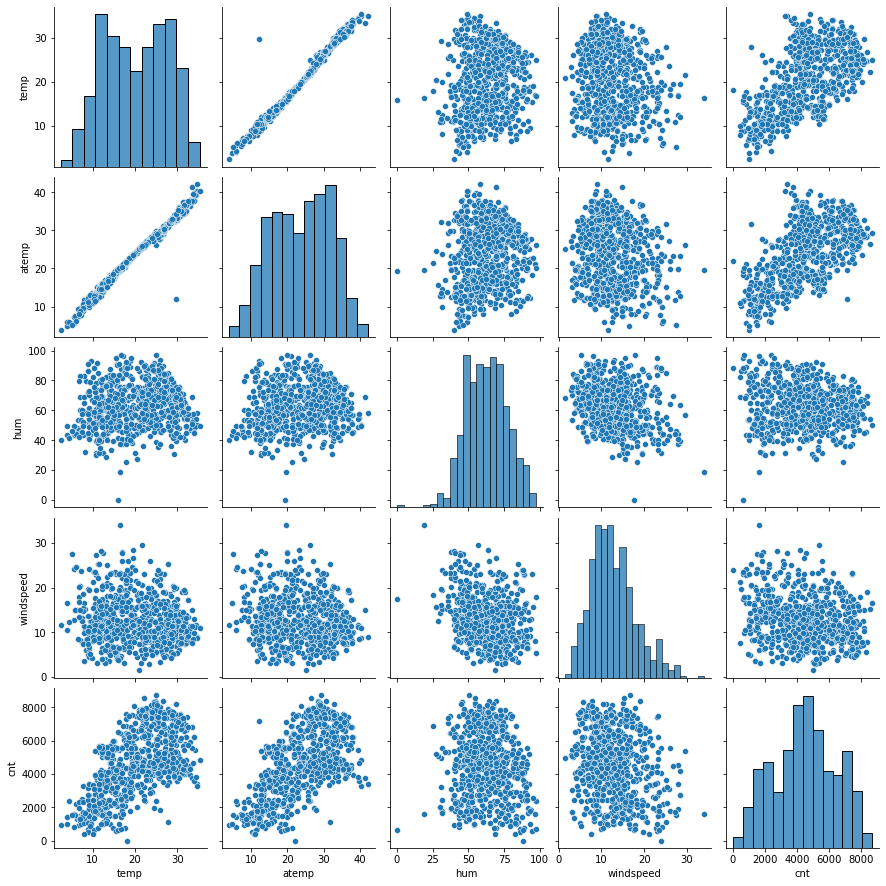

In [8]:
# Ploting Pairplot for all the Numeric variables
plt.figure()
sns.pairplot(numlist)
plt.show()

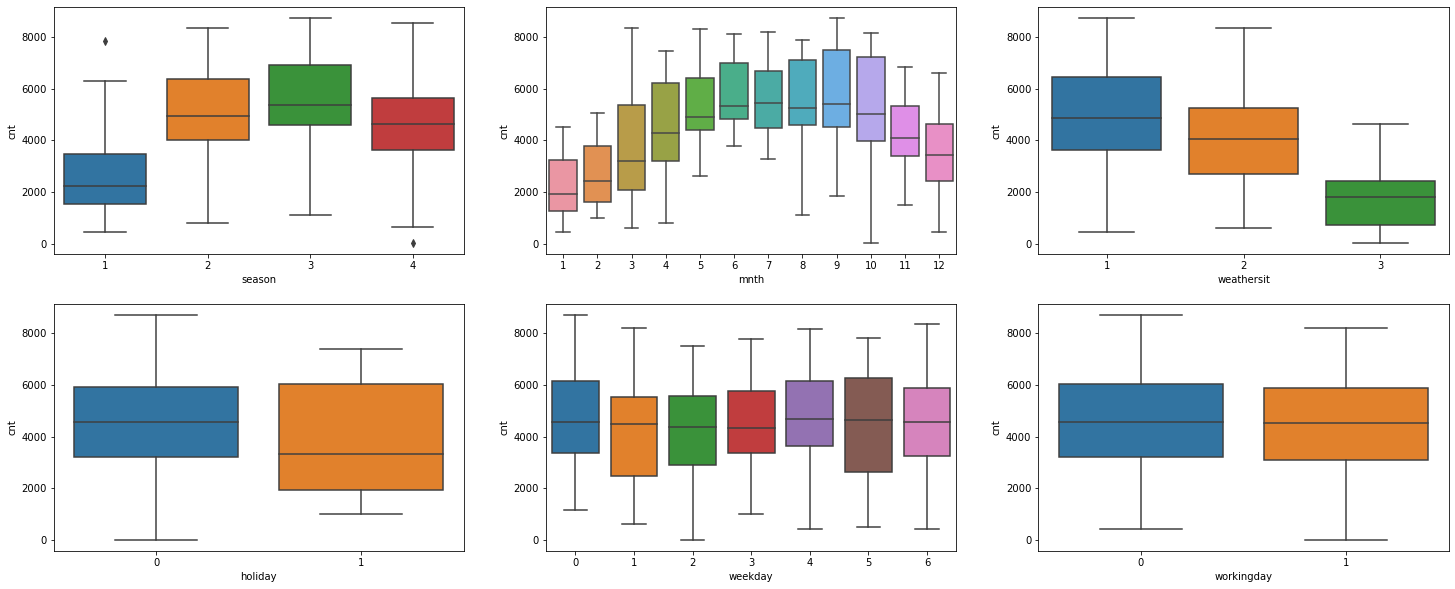

In [9]:
# Ploting Boxplot for all the Categorical variables
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

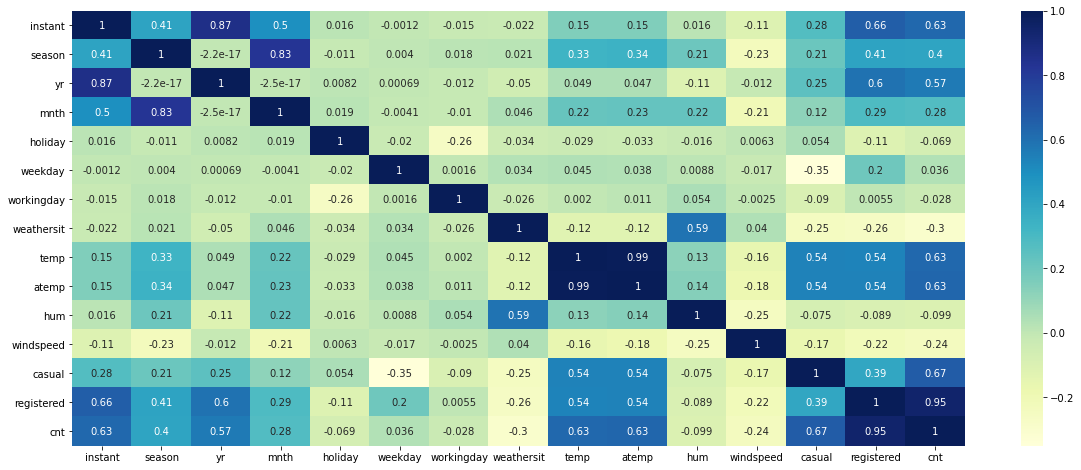

In [10]:
# Ploting Heatmap
plt.figure(figsize=(20,8))
sns.heatmap(bike.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [11]:
# dropping column
bike=bike.drop('instant',axis=1)
bike=bike.drop('dteday',axis=1)
bike=bike.drop('casual',axis=1)
bike=bike.drop('registered',axis=1)

In [12]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [13]:
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [14]:
# Defining the map function
bike.season=bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
# Defining the map function
bike.weathersit=bike.weathersit.map({1:'Clear', 2:'Mist', 3:'Light', 4:'Heavy'})
bike.weathersit.value_counts()

Clear    463
Mist     246
Light     21
Name: weathersit, dtype: int64

In [16]:
# Defining the map function
bike.mnth=bike.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr',5:'may', 6:'jun', 7:'jul', 8:'aug',9:'sep', 10:'oct', 11:'nov', 12:'dec'})
bike.mnth.value_counts()

aug    62
may    62
jan    62
mar    62
oct    62
jul    62
dec    62
sep    60
nov    60
apr    60
jun    60
feb    56
Name: mnth, dtype: int64

In [17]:
# Defining the map function
bike.weekday=bike.weekday.map({1:'mon', 2:'tue', 3:'wed', 4:'thu',5:'fri', 6:'sat', 0:'sun'})
bike.weekday.value_counts()

tue    105
mon    105
sun    104
fri    104
wed    104
sat    104
thu    104
Name: weekday, dtype: int64

In [18]:
# Get the dummy variables for the feature ['season','weathersit','mnth','weekday'] and store it in a new variable -['c1','c2','c3','c4']
c1=pd.get_dummies(bike.season,drop_first=True)
c2=pd.get_dummies(bike.weathersit,drop_first=True)
c3=pd.get_dummies(bike.mnth,drop_first=True)
c4=pd.get_dummies(bike.weekday,drop_first=True)

In [19]:
# Concat new columns to the dataframe
bike=pd.concat([bike,c1],axis=1)
bike=pd.concat([bike,c2],axis=1)
bike=pd.concat([bike,c3],axis=1)
bike=pd.concat([bike,c4],axis=1)

In [20]:
# Droping previous columns from dataframe
bike=bike.drop('season',axis=1)
bike=bike.drop('weathersit',axis=1)
bike=bike.drop('mnth',axis=1)
bike=bike.drop('weekday',axis=1)

In [21]:
bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   spring  summer  ...  may  nov  oct  sep  mon  sat  sun  thu  tue  wed  
0       1       0  ...    0    0    0    0    1    0    0    0    0    0  
1       1       0  ...    0    0    0    0    0    0    0    0    1    0  
2       1       0  ...    0    0    0    0    0    0    0    0    0    1  
3       1       0  ...    0    0    0    0    0    0    0    1    0    0  
4       1       0  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 30 columns]

In [22]:
bike.shape

(730, 30)

In [23]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 1000)

In [24]:
df_train.shape

(510, 30)

In [25]:
# Rescaling the Features
scaler = MinMaxScaler()

In [26]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

In [27]:
df_train[num_vars].describe()

temp       atemp         hum   windspeed          cnt
count  510.000000  510.000000  510.000000  510.000000   510.000000
mean    20.356515   23.759650   63.156031   12.793186  4492.794118
std      7.508655    8.145204   14.100496    5.243032  1912.405515
min      3.957390    4.941955    0.000000    1.500244    22.000000
25%     13.940000   16.926163   52.474150    9.041918  3214.000000
50%     20.363326   24.163125   63.604150   12.187601  4489.000000
75%     26.948962   30.547988   73.218750   15.657012  5902.500000
max     35.328347   42.044800   97.041700   34.000021  8714.000000

In [28]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-28-83f96a893732>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [29]:
df_train[num_vars].describe()

temp       atemp         hum   windspeed         cnt
count  510.000000  510.000000  510.000000  510.000000  510.000000
mean     0.522749    0.507177    0.650813    0.347478    0.514357
std      0.239351    0.219530    0.145303    0.161325    0.220019
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.318212    0.323000    0.540738    0.232053    0.367234
50%      0.522966    0.518051    0.655431    0.328844    0.513921
75%      0.732894    0.690137    0.754508    0.435596    0.676542
max      1.000000    1.000000    1.000000    1.000000    1.000000

In [30]:
y_train = df_train.pop('cnt')
X_train = df_train

In [31]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 20),
 ('winter', False, 3),
 ('Light', True, 1),
 ('Mist', False, 5),
 ('aug', False, 15),
 ('dec', False, 6),
 ('feb', False, 10),
 ('jan', False, 9),
 ('jul', True, 1),
 ('jun', False, 16),
 ('mar', False, 17),
 ('may', False, 8),
 ('nov', False, 7),
 ('oct', False, 13),
 ('sep', False, 4),
 ('mon', False, 18),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 19),
 ('tue', False, 12),
 ('wed', False, 14)]

In [33]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'spring', 'Light', 'jul',
       'sat', 'sun'],
      dtype='object')

In [34]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'summer', 'winter', 'Mist', 'aug', 'dec',
       'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'thu',
       'tue', 'wed'],
      dtype='object')

In [35]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [36]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [37]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [38]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     205.9
Date:                Thu, 29 Apr 2021   Prob (F-statistic):          5.77e-170
Time:                        22:42:10   Log-Likelihood:                 465.75
No. Observations:                 510   AIC:                            -909.5
Df Residuals:                     499   BIC:                            -862.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4388      0.031     14.001      0.0

In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0       const  52.01
3       atemp  51.11
2        temp  50.08
6      spring   1.76
8         jul   1.27
4         hum   1.21
5   windspeed   1.18
7       Light   1.11
9         sat   1.04
10        sun   1.04
1          yr   1.01

In [40]:
# Dropping Column 'atemp' (HIGH P-value and HIGH VIF) 
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [42]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [43]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.2
Date:                Thu, 29 Apr 2021   Prob (F-statistic):          8.72e-171
Time:                        22:42:10   Log-Likelihood:                 464.88
No. Observations:                 510   AIC:                            -909.8
Df Residuals:                     500   BIC:                            -867.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4472      0.031     14.566      0.0

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0      const  49.84
2       temp   2.03
5     spring   1.75
7        jul   1.27
3        hum   1.20
4  windspeed   1.15
6      Light   1.11
8        sat   1.04
9        sun   1.04
1         yr   1.01

In [45]:
# Dropping Column 'sat' (HIGH P-value)
X_train_new = X_train_lm.drop(["sat"], axis = 1)

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.9
Date:                Thu, 29 Apr 2021   Prob (F-statistic):          6.93e-172
Time:                        22:42:10   Log-Likelihood:                 464.60
No. Observations:                 510   AIC:                            -911.2
Df Residuals:                     501   BIC:                            -873.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4495      0.031     14.719      0.0

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0      const  49.34
2       temp   2.02
5     spring   1.74
7        jul   1.27
3        hum   1.19
4  windspeed   1.15
6      Light   1.10
1         yr   1.01
8        sun   1.00

In [48]:
#  Dropping Column 'sun' (HIGH P-value)
X_train_new = X_train_lm.drop(["sun"], axis = 1)

In [49]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()  

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     291.6
Date:                Thu, 29 Apr 2021   Prob (F-statistic):          2.38e-172
Time:                        22:42:11   Log-Likelihood:                 462.75
No. Observations:                 510   AIC:                            -909.5
Df Residuals:                     502   BIC:                            -875.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4525      0.031     14.797      0.0

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0      const  49.21
2       temp   2.02
5     spring   1.74
7        jul   1.27
3        hum   1.19
4  windspeed   1.15
6      Light   1.10
1         yr   1.01

In [51]:
y_train_price = lm.predict(X_train_lm)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


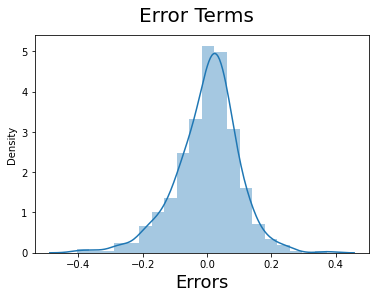

In [52]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
plt.show()

In [53]:
# Transforming Test Split
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

<ipython-input-53-c125da48fb30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.transform(df_test[num_vars])
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [54]:
y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
X_train_lm.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'spring', 'Light', 'jul'], dtype='object')

In [56]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['yr', 'temp', 'hum', 'windspeed', 'spring', 'Light', 'jul']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [57]:
# Making predictions
y_pred = lm.predict(X_test_new)

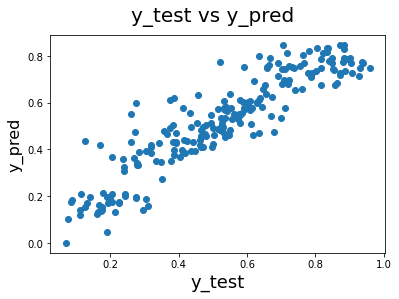

In [58]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    
plt.show()

In [59]:
# Calculating R-squared score
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.8289737799639523

In [60]:
# Calculating Adjusted R-squared score
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8027316615457227